In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/home/deepanshu/Downloads/finaldataCopy.csv')

In [3]:
dataset.columns

Index(['URL', 'sales_rank', 'overall_rating', 'discount_value',
       'discount_rate', 'feature1', 'answered_ques', 'positive', 'negative',
       'exchange', 'emi', 'No_of_people', 'customer_reviews', 'most_helpful',
       'bank_offer', 'months', '5_rating', '4_rating', '3_rating', '2_rating',
       '1_rating', 'feature2', 'feature3'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 23 columns):
URL                 1114 non-null object
sales_rank          1114 non-null int64
overall_rating      1114 non-null float64
discount_value      1114 non-null float64
discount_rate       1114 non-null int64
feature1            1114 non-null float64
answered_ques       1114 non-null int64
positive            1114 non-null int64
negative            1114 non-null int64
exchange            1114 non-null int64
emi                 1114 non-null float64
No_of_people        1114 non-null int64
customer_reviews    1114 non-null int64
most_helpful        1114 non-null int64
bank_offer          1114 non-null int64
months              1110 non-null object
5_rating            1114 non-null int64
4_rating            1114 non-null int64
3_rating            1114 non-null int64
2_rating            1114 non-null int64
1_rating            1113 non-null float64
feature2            1114 non-null float64

In [5]:
# dataset.drop('Unnamed: 21', axis='columns', inplace=True)
dataset.drop('URL', axis='columns', inplace=True)

In [6]:
labels = np.array(dataset['sales_rank'])
features = dataset.drop(['sales_rank', 'bank_offer',
       'months', '5_rating', '4_rating', '3_rating', '2_rating', '1_rating',
       'feature2', 'feature3'], axis=1)
# Saving feature names for later use
feature_list = list(features.columns)
features = np.array(features)

In [7]:
feature_list

['overall_rating',
 'discount_value',
 'discount_rate',
 'feature1',
 'answered_ques',
 'positive',
 'negative',
 'exchange',
 'emi',
 'No_of_people',
 'customer_reviews',
 'most_helpful']

In [8]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 0)

## RandomizedSearchCV

In [9]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 1000, num = 20)]
# Number of features to consider at every split
# max_features = ['auto', 'sqrt'] /'max_features': max_features,
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# bootstrap = [True, False] /'bootstrap': bootstrap

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }

print(random_grid)

{'n_estimators': [20, 71, 123, 174, 226, 277, 329, 381, 432, 484, 535, 587, 638, 690, 742, 793, 845, 896, 948, 1000], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}


In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(features, labels)

"""The most important arguments in RandomizedSearchCV are n_iter, 
which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). 
More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. 
Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental."""

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=432, min_samples_split=2, min_samples_leaf=4, max_depth=40 
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_depth=None 
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_depth=None 
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_depth=None 
[CV]  n_estimators=432, min_samples_split=2, min_samples_leaf=4, max_depth=40, total=   4.7s
[CV] n_estimators=432, min_samples_split=2, min_samples_leaf=4, max_depth=40 
[CV]  n_estimators=432, min_samples_split=2, min_samples_leaf=4, max_depth=40, total=   4.4s
[CV] n_estimators=432, min_samples_split=2, min_samples_leaf=4, max_depth=40 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_depth=None, total=  10.8s
[CV] n_estimators=690, min_samples_split=5, min_samples_leaf=2, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_depth=None, total=  11.1s
[C

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min


[CV]  n_estimators=742, min_samples_split=2, min_samples_leaf=4, max_depth=40, total=   7.7s
[CV] n_estimators=845, min_samples_split=5, min_samples_leaf=2, max_depth=10 
[CV]  n_estimators=587, min_samples_split=5, min_samples_leaf=1, max_depth=None, total=   6.8s
[CV] n_estimators=845, min_samples_split=5, min_samples_leaf=2, max_depth=10 
[CV]  n_estimators=587, min_samples_split=5, min_samples_leaf=1, max_depth=None, total=   7.5s
[CV] n_estimators=226, min_samples_split=5, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=845, min_samples_split=5, min_samples_leaf=2, max_depth=10, total=   9.4s
[CV] n_estimators=226, min_samples_split=5, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=226, min_samples_split=5, min_samples_leaf=2, max_depth=70, total=   2.6s
[CV] n_estimators=226, min_samples_split=5, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=845, min_samples_split=5, min_samples_leaf=2, max_depth=10, total=   9.8s
[CV] n_estimators=381, min_samples_split=5, min_

[CV]  n_estimators=20, min_samples_split=10, min_samples_leaf=4, max_depth=80, total=   0.2s
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=20, min_samples_split=10, min_samples_leaf=4, max_depth=80, total=   0.2s
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=20, min_samples_split=10, min_samples_leaf=4, max_depth=80, total=   0.2s
[CV] n_estimators=277, min_samples_split=2, min_samples_leaf=2, max_depth=60 
[CV]  n_estimators=277, min_samples_split=2, min_samples_leaf=2, max_depth=60, total=   3.1s
[CV] n_estimators=277, min_samples_split=2, min_samples_leaf=2, max_depth=60 
[CV]  n_estimators=587, min_samples_split=2, min_samples_leaf=2, max_depth=20, total=   6.7s
[CV] n_estimators=277, min_samples_split=2, min_samples_leaf=2, max_depth=60 
[CV]  n_estimators=587, min_samples_split=2, min_samples_leaf=2, max_depth=20, total=   6.6s
[CV] n_estimators=484, min_samples_split=10, min_sam

[CV] n_estimators=690, min_samples_split=2, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=535, min_samples_split=5, min_samples_leaf=2, max_depth=40, total=   6.0s
[CV] n_estimators=690, min_samples_split=2, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=535, min_samples_split=5, min_samples_leaf=2, max_depth=40, total=   6.0s
[CV] n_estimators=690, min_samples_split=2, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=535, min_samples_split=5, min_samples_leaf=2, max_depth=40, total=   5.8s
[CV] n_estimators=690, min_samples_split=2, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=690, min_samples_split=2, min_samples_leaf=4, max_depth=80, total=   6.9s
[CV] n_estimators=690, min_samples_split=2, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=690, min_samples_split=2, min_samples_leaf=4, max_depth=80, total=   7.0s
[CV] n_estimators=690, min_samples_split=2, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=690, min_samples_split=2, min_samples_leaf=4,

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min


[CV]  n_estimators=226, min_samples_split=2, min_samples_leaf=4, max_depth=100, total=   2.3s
[CV] n_estimators=226, min_samples_split=2, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=793, min_samples_split=2, min_samples_leaf=4, max_depth=30, total=   8.2s
[CV] n_estimators=381, min_samples_split=2, min_samples_leaf=4, max_depth=20 
[CV]  n_estimators=793, min_samples_split=2, min_samples_leaf=4, max_depth=30, total=   8.1s
[CV] n_estimators=381, min_samples_split=2, min_samples_leaf=4, max_depth=20 
[CV]  n_estimators=793, min_samples_split=2, min_samples_leaf=4, max_depth=30, total=   8.0s
[CV] n_estimators=381, min_samples_split=2, min_samples_leaf=4, max_depth=20 
[CV]  n_estimators=226, min_samples_split=2, min_samples_leaf=4, max_depth=100, total=   2.4s
[CV] n_estimators=742, min_samples_split=2, min_samples_leaf=4, max_depth=10 
[CV]  n_estimators=381, min_samples_split=2, min_samples_leaf=4, max_depth=20, total=   3.9s
[CV] n_estimators=742, min_samples_split=2, min_s

[CV]  n_estimators=329, min_samples_split=2, min_samples_leaf=2, max_depth=90, total=   3.7s
[CV] n_estimators=432, min_samples_split=2, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=329, min_samples_split=2, min_samples_leaf=2, max_depth=90, total=   4.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_depth=50 
[CV]  n_estimators=432, min_samples_split=2, min_samples_leaf=2, max_depth=110, total=   5.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_depth=50 
[CV]  n_estimators=432, min_samples_split=2, min_samples_leaf=2, max_depth=110, total=   5.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_depth=50 
[CV]  n_estimators=432, min_samples_split=2, min_samples_leaf=2, max_depth=110, total=   5.6s
[CV] n_estimators=381, min_samples_split=10, min_samples_leaf=4, max_depth=30 
[CV]  n_estimators=381, min_samples_split=10, min_samples_leaf=4, max_depth=30, total=   3.8s
[CV] n_estimators=381, min_samples_split=10

[CV] n_estimators=742, min_samples_split=10, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=535, min_samples_split=2, min_samples_leaf=2, max_depth=10, total=   5.7s
[CV] n_estimators=742, min_samples_split=10, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=535, min_samples_split=2, min_samples_leaf=2, max_depth=10, total=   5.7s
[CV] n_estimators=381, min_samples_split=2, min_samples_leaf=1, max_depth=50 
[CV]  n_estimators=381, min_samples_split=2, min_samples_leaf=1, max_depth=50, total=   4.8s
[CV] n_estimators=381, min_samples_split=2, min_samples_leaf=1, max_depth=50 
[CV]  n_estimators=742, min_samples_split=10, min_samples_leaf=2, max_depth=70, total=   8.1s
[CV] n_estimators=381, min_samples_split=2, min_samples_leaf=1, max_depth=50 
[CV]  n_estimators=742, min_samples_split=10, min_samples_leaf=2, max_depth=70, total=   7.7s
[CV] n_estimators=948, min_samples_split=10, min_samples_leaf=2, max_depth=30 
[CV]  n_estimators=742, min_samples_split=10, min_samples_leaf

[CV]  n_estimators=226, min_samples_split=5, min_samples_leaf=2, max_depth=None, total=   2.7s
[CV]  n_estimators=535, min_samples_split=10, min_samples_leaf=2, max_depth=40, total=   6.9s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.3min finished


'The most important arguments in RandomizedSearchCV are n_iter, \nwhich controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). \nMore iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. \nMachine learning is a field of trade-offs, and performance vs time is one of the most fundamental.'

In [28]:
# We can view the best parameters from fitting the random search:
rf_random.best_params_

{'max_depth': 90,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 329}

In [29]:
predictions = rf_random.predict(test_features)

In [30]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 288.78 degrees.


In [31]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 58.14 %.


In [32]:
rf.fit(train_features, train_labels);

In [33]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: exchange             Importance: 0.23
Variable: feature1             Importance: 0.16
Variable: No_of_people         Importance: 0.14
Variable: discount_value       Importance: 0.08
Variable: answered_ques        Importance: 0.08
Variable: customer_reviews     Importance: 0.08
Variable: discount_rate        Importance: 0.07
Variable: overall_rating       Importance: 0.05
Variable: positive             Importance: 0.05
Variable: negative             Importance: 0.04
Variable: most_helpful         Importance: 0.02
Variable: emi                  Importance: 0.01


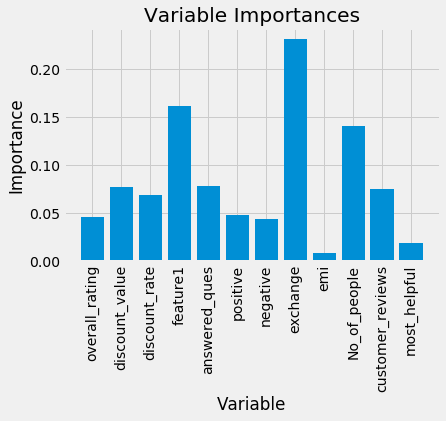

In [34]:
# Import matplotlib for plotting 
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation = 'vertical')

# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances');